In [1]:
import pandas as pd
import numpy as np
from pymatgen.core import Composition
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import numpy as np
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['Arial'],
    "font.size": 24,
    'axes.unicode_minus': False 
}
plt.rcParams.update(config)
plt.rcParams['axes.unicode_minus'] = False  
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (8, 6),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.rcParams['figure.dpi'] = 400
plt.rcParams['axes.grid'] = False

/home/zhouhairui/anaconda3/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [ ]:
base_metal_oxide = pd.read_csv('/data/single_perovskite_oxide.csv')
base_metal_oxide = base_metal_oxide.drop(columns = 'Unnamed: 0').reset_index(drop=True)
base_metal_oxide = base_metal_oxide.drop(columns = 'composition').reset_index(drop=True)
base_metal_oxide['composition'] = base_metal_oxide['formula'].map(Composition)
y_eg_abo3 = base_metal_oxide['target']

In [ ]:
pysic_features_ABO3 = pd.read_csv('/data/pysic_features_ABO3.csv').drop(columns = 'Unnamed: 0')
pysic_labels = pysic_features_ABO3.columns.drop('formula')

In [15]:
pysic_features_ABO3

formula  A_Density  B_Density  O_Density  A_dipole Polarizability  \
0   SmCrO3      7.520       7.15    0.00143                    192.0   
1   ScCoO3      2.990       8.86    0.00143                     97.0   
2   GdCrO3      7.900       7.15    0.00143                    158.0   
3    YCrO3      4.470       7.15    0.00143                    162.0   
4   LaFeO3      6.150       7.87    0.00143                    215.0   
5   SmCoO3      7.520       8.86    0.00143                    192.0   
6    YFeO3      4.470       7.87    0.00143                    162.0   
7   LaCrO3      6.150       7.15    0.00143                    215.0   
8   PrCrO3      6.770       7.15    0.00143                    216.0   
9   NdCrO3      7.010       7.15    0.00143                    208.0   
10   YCoO3      4.470       8.86    0.00143                    162.0   
11  TmCrO3      9.320       7.15    0.00143                    144.0   
12  SmFeO3      7.520       7.87    0.00143                    192.0   
13  NdCoO3      7.010       8.86    0.00143                    208.0   
14  RbNbO3      1.530       8.57    0.00143                    319.8   
15  DyInO3      8.550       7.31    0.00143                    163.0   
16  PmErO3      7.260       9.07    0.00143                    200.0   
17  HfBeO3     13.300       1.85    0.00143                    103.0   
18  CsNbO3      1.870       8.57    0.00143                    400.9   
19  YbGeO3      6.970       5.32    0.00143                    139.0   
20  CeBeO3      6.770       1.85    0.00143                    205.0   
21  SnPbO3     11.300       7.29    0.00143                     47.0   
22  CdSnO3      8.690       7.29    0.00143                     46.0   
23  MgTiO3      1.740       4.54    0.00143                     71.2   
24  GaBiO3      9.810       5.91    0.00143                     48.0   
25  NbTlO3     11.900       8.57    0.00143                     50.0   
26  TaAgO3     10.500      16.70    0.00143                     55.0   
27  GdAlO3      7.900       2.70    0.00143                    158.0   
28  PmInO3      7.260       7.31    0.00143                    200.0   
29  InBiO3      9.810       7.31    0.00143                     48.0   
30  CdGeO3      8.690       5.32    0.00143                     46.0   
31  EuZrO3      5.240       6.51    0.00143                    184.0   
32   KNbO3      0.862       8.57    0.00143                    289.7   
33  TaTlO3     11.900      16.70    0.00143                     50.0   
34  NdInO3      7.010       7.31    0.00143                    208.0   
35  CsTaO3      1.870      16.70    0.00143                    400.9   
36  RbTaO3      1.530      16.70    0.00143                    319.8   
37  CaTiO3      1.540       4.54    0.00143                    160.8   
38  InSbO3      7.310       6.69    0.00143                     65.0   
39  EuHfO3      5.240      13.30    0.00143                    184.0   
40  BaCeO3      3.590       6.77    0.00143                    272.0   
41  BaSnO3      3.590       7.29    0.00143                    272.0   
42  BaTiO3      3.590       4.54    0.00143                    272.0   
43  HfPbO3     11.300      13.30    0.00143                     47.0   
44   KTaO3      0.862      16.70    0.00143                    289.7   
45  NaNbO3      0.971       8.57    0.00143                    162.7   
46  NbAgO3     10.500       8.57    0.00143                     55.0   
47  SrSnO3      2.640       7.29    0.00143                    197.2   
48  SrTiO3      2.640       4.54    0.00143                    197.2   
49  TiPbO3     11.300       4.54    0.00143                     47.0   
50  TiSnO3      7.290       4.54    0.00143                     53.0   
51  ZrPbO3     11.300       6.51    0.00143                     47.0   

    B_dipole Polarizability  O_dipole Polarizability  A_covalent Radius  \
0                     83.00                      5.3                172   
1                     55.00         

In [16]:
def get_combined_features(data: pd.DataFrame):
    columns = data.columns
    A_features = []
    B_features = []
    O_features = []
    for column in columns:
        if str(column).__contains__('A'):
            A_features.append(column)
        elif str(column).__contains__('B'):
            B_features.append(column)
        elif str(column).__contains__('O'):
            O_features.append(column)

    for a_feature, b_feature, o_feature in zip(A_features, B_features, O_features):
        feature_name = str(a_feature).split('_')[1]
        feature_name = feature_name
        data['A-B_'+feature_name] = np.abs(data[a_feature] - data[b_feature])
        data['(A+B)-O_'+feature_name] = np.abs((data[a_feature] + data[b_feature])- data[o_feature])


    data = data.drop(columns=O_features)
    return data

In [17]:
pysic_features_ABO3 = pysic_features_ABO3[pysic_labels]
pysic_features_ABO3 = get_combined_features(pysic_features_ABO3)
pysic_labels_48 = pysic_features_ABO3.columns

In [18]:
pysic_labels_48

Index(['A_Density', 'B_Density', 'A_dipole Polarizability',
       'B_dipole Polarizability', 'A_covalent Radius', 'B_covalent Radius',
       'A_atomic Radius', 'B_atomic Radius', 'A_FirstIonization',
       'B_FirstIonization', 'A_number of Valence Electrons',
       'B_number of Valence Electrons', 'A_number', 'B_number', 'A_Period',
       'B_Period', 'A_Electronegativity', 'B_Electronegativity',
       'A_number of s+p Electrons', 'B_number of s+p Electrons',
       'A_number of d Electrons', 'B_number of d Electrons', 'A_Mulliken EN',
       'B_Mulliken EN', 'A-B_Density', '(A+B)-O_Density',
       'A-B_dipole Polarizability', '(A+B)-O_dipole Polarizability',
       'A-B_covalent Radius', '(A+B)-O_covalent Radius', 'A-B_atomic Radius',
       '(A+B)-O_atomic Radius', 'A-B_FirstIonization',
       '(A+B)-O_FirstIonization', 'A-B_number of Valence Electrons',
       '(A+B)-O_number of Valence Electrons', 'A-B_number', '(A+B)-O_number',
       'A-B_Period', '(A+B)-O_Period', 'A-B_El

In [ ]:
re_data = pd.read_csv('/data/model_select_df.csv')
re_data

formula A1_x  A1_ratio_x  nA1_x A2_x  A2_ratio_x  nA2_x B1_x  \
0      Sm0.2Sc0.8Cr1O3   Sm         0.2      3   Sc         0.8      3   Cr   
1      Sm0.2Sc0.8Fe1O3   Sm         0.2      3   Sc         0.8      3   Fe   
2      Sm0.2Zr1Sc0.8O3   Sm         0.2      3   Sc         0.8      3   Zr   
3      Sm0.2Sc0.8Ge1O3   Sm         0.2      3   Sc         0.8      3   Ge   
4      Sm0.2Hf1Sc0.8O3   Sm         0.2      3   Sc         0.8      3   Hf   
...                ...  ...         ...    ...  ...         ...    ...  ...   
35320  Sr1Ce0.7Zr0.3O3   Sr         1.0      2   Sr         0.0      2   Ce   
35321  Sr1Ce0.7Be0.3O3   Sr         1.0      2   Sr         0.0      2   Ce   
35322  Sr1Ce0.7Ge0.3O3   Sr         1.0      2   Sr         0.0      2   Ce   
35323  Sr1Ce0.7Hf0.3O3   Sr         1.0      2   Sr         0.0      2   Ce   
35324  Sr1Ce0.7Ti0.3O3   Sr         1.0      2   Sr         0.0      2   Ce   

       B1_ratio_x B2_x  ...  B_number of s+p Electrons  \
0             1.0   Cr  ...                        1.0   
1             1.0   Fe  ...                        2.0   
2             1.0   Zr  ...                        2.0   
3             1.0   Ge  ...                        4.0   
4             1.0   Hf  ...                        2.0   
...           ...  ...  ...                        ...   
35320         0.7   Zr  ...                        2.0   
35321         0.7   Be  ...                        2.0   
35322         0.7   Ge  ...                        2.6   
35323         0.7   Hf  ...                        2.0   
35324         0.7   Ti  ...                        2.0   

      O_number of s+p Electrons  A_number of d Electrons  \
0                             6                      0.8   
1                             6                      0.8   
2                             6                      0.8   
3                             6                      0.8   
4                             6                      0.8   
...                         ...                      ...   
35320                         6                      0.0   
35321                         6                      0.0   
35322                         6                      0.0   
35323                         6                      0.0   
35324                         6                      0.0   

       B_number of d Electrons  O_number of d Electrons  A_Mulliken EN  \
0                          5.0                        0          3.292   
1                          6.0                        0          3.292   
2                          2.0                        0          3.292   
3                          0.0                        0          3.292   
4                          2.0                        0          3.292   
...                        ...                      ...            ...   
35320                      1.3                        0          2.000   
35321                      0.7                        0          2.000   
35322                      0.7                        0          2.000   
35323                      1.3                        0          2.000   
35324                      1.3                        0          2.000   

       B_Mulliken EN O_Mulliken EN  mean_hse      mean  
0              3.720          7.54  2.146025  2.226143  
1              4.060          7.54  1.374682  1.257144  
2              3.640          7.54  4.177025  4.656852  
3              4.600          7.54  3.941249  4.926561  
4              3.800          7.54  4.529786  4.824700  
...              ...           ...       ...       ...  
35320          3.262          7.54  3.843865  3.809557  
35321          3.640          7.54  3.431016  3.722268  
35322          3.550          7.54  2.085930  2.607413  
35323          3.310          7.54  3.646532  3.703532  
35324          3.205          7.54  3.178124  3.456544  

[35325 rows x 213 columns]

In [20]:
pysic_features = re_data[pysic_labels]
pysic_features =  get_combined_features(pysic_features)
pysic_features[['formula','Eg']] = re_data[['formula','mean_hse']]
pysic_features

A_Density  B_Density  A_dipole Polarizability  B_dipole Polarizability  \
0          3.896      7.150                    116.0                   83.000   
1          3.896      7.870                    116.0                   62.000   
2          3.896      6.510                    116.0                  112.000   
3          3.896      5.320                    116.0                   40.000   
4          3.896     13.300                    116.0                  103.000   
...          ...        ...                      ...                      ...   
35320      2.640      6.692                    197.2                  177.100   
35321      2.640      5.294                    197.2                  154.822   
35322      2.640      6.335                    197.2                  155.500   
35323      2.640      8.729                    197.2                  174.400   
35324      2.640      6.101                    197.2                  173.500   

       A_covalent Radius  B_covalent Radius  A_atomic Radius  B_atomic Radius  \
0                  152.8              122.0             1.65            1.400   
1                  152.8              116.0             1.65            1.400   
2                  152.8              154.0             1.65            1.550   
3                  152.8              121.0             1.65            1.250   
4                  152.8              152.0             1.65            1.550   
...                  ...                ...              ...              ...   
35320              185.0              160.3             2.00            1.760   
35321              185.0              144.7             2.00            1.610   
35322              185.0              150.4             2.00            1.670   
35323              185.0              159.7             2.00            1.760   
35324              185.0              154.9             2.00            1.715   

       A_FirstIonization  B_FirstIonization  ...  A-B_Electronegativity  \
0                 615.38             652.90  ...                  0.338   
1                 615.38             762.50  ...                  0.508   
2                 615.38             640.10  ...                  0.008   
3                 615.38             762.00  ...                  0.688   
4                 615.38             658.50  ...                  0.022   
...                  ...                ...  ...                    ...   
35320             549.50             566.11  ...                  0.233   
35321             549.50             643.93  ...                  0.305   
35322             549.50             602.68  ...                  0.437   
35323             549.50             571.63  ...                  0.224   
35324             549.50             571.72  ...                  0.296   

       (A+B)-O_Electronegativity  A-B_number of s+p Electrons  \
0                          0.458                          1.0   
1                          0.288                          0.0   
2                          0.788                          0.0   
3                          0.108                          2.0   
4                          0.818                          0.0   
...                          ...                          ...   
35320                      1.307                          0.0   
35321                      1.235                          0.0   
35322                      1.103                          0.6   
35323                      1.316                          0.0   
35324                      1.244                          0.0   

       (A+B)-O_number of s+p Electrons  A-B_number of d Electrons  \
0                                  3.0                        4.2   
1                                  2.0                        5.2   
2                                  2.0                        1.2   
3                                  0.0                        0.8   
4                                 

In [21]:
from scipy.stats import spearmanr
def remove_collinear_features(x, y,threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''  
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
#                 print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                x1 = x[col.values[0]]
                x2 = x[row.values[0]]
                corr1,p1 = spearmanr(x1, y)
                corr2,p2 = spearmanr(x2, y)
                if np.abs(corr1) < np.abs(corr2):
                    drop_cols.append(col.values[0])
                else:
                    drop_cols.append(row.values[0])
    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    return x

In [22]:
feature = pysic_features.copy(deep = True)
X = feature[pysic_labels_48].copy(deep = True)
y = feature['Eg']
X = remove_collinear_features(X,y,0.8)
features_labels = X.columns
X = feature[features_labels]
X.columns

Index(['A_Density', 'B_Density', 'A_covalent Radius', 'B_atomic Radius',
       'B_FirstIonization', 'B_number of Valence Electrons',
       'A_number of s+p Electrons', 'B_number of s+p Electrons',
       'A_number of d Electrons', 'B_number of d Electrons', 'A-B_Density',
       '(A+B)-O_Density', 'A-B_atomic Radius', 'A-B_FirstIonization',
       'A-B_number of Valence Electrons',
       '(A+B)-O_number of Valence Electrons', 'A-B_Period', '(A+B)-O_Period',
       'A-B_Electronegativity', '(A+B)-O_Electronegativity',
       'A-B_number of s+p Electrons', '(A+B)-O_number of s+p Electrons',
       'A-B_number of d Electrons', '(A+B)-O_number of d Electrons',
       '(A+B)-O_Mulliken EN'],
      dtype='object')

In [23]:
X

A_Density  B_Density  A_covalent Radius  B_atomic Radius  \
0          3.896      7.150              152.8            1.400   
1          3.896      7.870              152.8            1.400   
2          3.896      6.510              152.8            1.550   
3          3.896      5.320              152.8            1.250   
4          3.896     13.300              152.8            1.550   
...          ...        ...                ...              ...   
35320      2.640      6.692              185.0            1.760   
35321      2.640      5.294              185.0            1.610   
35322      2.640      6.335              185.0            1.670   
35323      2.640      8.729              185.0            1.760   
35324      2.640      6.101              185.0            1.715   

       B_FirstIonization  B_number of Valence Electrons  \
0                 652.90                            6.0   
1                 762.50                            8.0   
2                 640.10                            4.0   
3                 762.00                            4.0   
4                 658.50                            4.0   
...                  ...                            ...   
35320             566.11                            3.3   
35321             643.93                            2.7   
35322             602.68                            3.3   
35323             571.63                            3.3   
35324             571.72                            3.3   

       A_number of s+p Electrons  B_number of s+p Electrons  \
0                            2.0                        1.0   
1                            2.0                        2.0   
2                            2.0                        2.0   
3                            2.0                        4.0   
4                            2.0                        2.0   
...                          ...                        ...   
35320                        2.0                        2.0   
35321                        2.0                        2.0   
35322                        2.0                        2.6   
35323                        2.0                        2.0   
35324                        2.0                        2.0   

       A_number of d Electrons  B_number of d Electrons  ...  \
0                          0.8                      5.0  ...   
1                          0.8                      6.0  ...   
2                          0.8                      2.0  ...   
3                          0.8                      0.0  ...   
4                          0.8                      2.0  ...   
...                        ...                      ...  ...   
35320                      0.0                      1.3  ...   
35321                      0.0                      0.7  ...   
35322                      0.0                      0.7  ...   
35323                      0.0                      1.3  ...   
35324                      0.0                      1.3  ...   

       (A+B)-O_number of Valence Electrons  A-B_Period  (A+B)-O_Period  \
0                                      3.0         0.4             6.4   
1                                      5.0         0.4             6.4   
2                                      1.0         0.6             7.4   
3                                      1.0         0.4             6.4   
4                                      1.0         1.6             8.4   
...                                    ...         ...             ...   
35320                                  0.7         0.7             8.7   
35321                                  1.3         0.2             7.8   
35322                                  0.7         0.4             8.4   
35323                                  0.7         1.0             9.0   
35324                                  0.7         0.4             8.4   

       A-B_Electronegativity  (A+B)-O_Electronegativity  \
0                  

In [24]:
X1 = X.copy(deep = True)
X1['Eg'] = y
df = X1
df

A_Density  B_Density  A_covalent Radius  B_atomic Radius  \
0          3.896      7.150              152.8            1.400   
1          3.896      7.870              152.8            1.400   
2          3.896      6.510              152.8            1.550   
3          3.896      5.320              152.8            1.250   
4          3.896     13.300              152.8            1.550   
...          ...        ...                ...              ...   
35320      2.640      6.692              185.0            1.760   
35321      2.640      5.294              185.0            1.610   
35322      2.640      6.335              185.0            1.670   
35323      2.640      8.729              185.0            1.760   
35324      2.640      6.101              185.0            1.715   

       B_FirstIonization  B_number of Valence Electrons  \
0                 652.90                            6.0   
1                 762.50                            8.0   
2                 640.10                            4.0   
3                 762.00                            4.0   
4                 658.50                            4.0   
...                  ...                            ...   
35320             566.11                            3.3   
35321             643.93                            2.7   
35322             602.68                            3.3   
35323             571.63                            3.3   
35324             571.72                            3.3   

       A_number of s+p Electrons  B_number of s+p Electrons  \
0                            2.0                        1.0   
1                            2.0                        2.0   
2                            2.0                        2.0   
3                            2.0                        4.0   
4                            2.0                        2.0   
...                          ...                        ...   
35320                        2.0                        2.0   
35321                        2.0                        2.0   
35322                        2.0                        2.6   
35323                        2.0                        2.0   
35324                        2.0                        2.0   

       A_number of d Electrons  B_number of d Electrons  ...  A-B_Period  \
0                          0.8                      5.0  ...         0.4   
1                          0.8                      6.0  ...         0.4   
2                          0.8                      2.0  ...         0.6   
3                          0.8                      0.0  ...         0.4   
4                          0.8                      2.0  ...         1.6   
...                        ...                      ...  ...         ...   
35320                      0.0                      1.3  ...         0.7   
35321                      0.0                      0.7  ...         0.2   
35322                      0.0                      0.7  ...         0.4   
35323                      0.0                      1.3  ...         1.0   
35324                      0.0                      1.3  ...         0.4   

       (A+B)-O_Period  A-B_Electronegativity  (A+B)-O_Electronegativity  \
0                 6.4                  0.338                      0.458   
1                 6.4                  0.508                      0.288   
2                 7.4                  0.008                      0.788   
3                 6.4                  0.688                      0.108   
4                 8.4                  0.022                      0.818   
...               ...                    ...                        ...   
35320             8.7                  0.233                      1.307   
35321             7.8                  0.305                      1.235   
35322             8.4                  0.437                      1.103   
35323             9.0                  0.224                      1.316  

# Featureselection_GA

In [16]:
def init_population(n,c):
    return np.array([[math.ceil(e) for e in pop] for pop in (np.random.rand(n,c)-0.5)]), np.zeros((2,c))-1

def single_point_crossover(population):
    r,c, n = population.shape[0], population.shape[1], np.random.randint(1,population.shape[1])         
    for i in range(0,r,2):                
        population[i], population[i+1] = np.append(population[i][0:n],population[i+1][n:c]),np.append(population[i+1][0:n],population[i][n:c])        
    return population

def flip_mutation(population):
    return population.max() - population

def random_selection(population):
    r = population.shape[0]
    new_population = population.copy()    
    for i in range(r):        
        new_population[i] = population[np.random.randint(0,r)]
    return new_population

In [17]:
def predictive_model(X,y,model):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True, random_state=42)
    mdl = model
    mdl.fit(X_train,y_train) 
    y_pred = mdl.predict(X_test)
    return r2_score(y_test, y_pred)

In [18]:
def get_fitness(data,feature_list,target,population,model):    
    fitness = []
    for i in range(population.shape[0]):    
        columns = [feature_list[j] for j in range(population.shape[1]) if population[i,j]==1]
        score = predictive_model(data[columns], data[target],model)
        fitness.append(score)                
    return fitness

In [19]:
# def individual_fitness(individual, data, feature_list, target, model):
#     columns = [feature_list[j] for j in range(individual.shape[0]) if individual[j] == 1]
#     X = data[columns]
#     y = data[target]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
#     mdl = model
#     mdl.fit(X_train, y_train)
#     y_pred = mdl.predict(X_test)
#     return accuracy_score(y_test, y_pred)

# def get_fitness(data, feature_list, target, population, model):
#     fitness = Parallel(n_jobs=-1)(delayed(individual_fitness)(individual, data, feature_list, target, model) for individual in population)
#     return np.array(fitness)

In [20]:
def memorize(pop, memory):      
    return np.append(memory, pop.reshape(1,memory.shape[1]), axis=0)

In [21]:
def replace_duplicate(population, memory):    
    for i in range(population.shape[0]):         
        counter = 0                
        while any(np.all(memory == population[i], axis=1)) and (counter < 100): 
            population[i] = np.array([math.ceil(k) for k in (np.random.rand(population.shape[1])-0.5)])                    
            counter += 1                    
        memory = memorize(population[i], memory)   
    return population, memory

In [22]:
def ga(data, feature_list, target, n, max_iter,model):
    
    c = len(feature_list)
    
    population, memory = init_population(n,c)
    population, memory = replace_duplicate(population, memory)    
    
    fitness = get_fitness(data, feature_list, target, population,model)    
    
    optimal_value = max(fitness)
    optimal_solution = population[np.where(fitness==optimal_value)][0]    
    
    for i in range(max_iter): 
        start = time()
        population = random_selection(population)
        population = single_point_crossover(population)                        
        if np.random.rand() < 0.3:
            population = flip_mutation(population)   
        
        population, memory = replace_duplicate(population, memory)
                
        fitness = get_fitness(data, feature_list, target, population,model)
                
        if max(fitness) > optimal_value:
            optimal_value    = max(fitness)
            optimal_solution = population[np.where(fitness==optimal_value)][0]                               
        end = time()
        print(f"第 %d 次迭代T = %0.4f, optimize_value = %0.4f" % (i,end - start,optimal_value))
    return optimal_solution, optimal_value

In [26]:
model_0 = RandomForestRegressor(n_jobs=-1,random_state=42)
model_1 = XGBRegressor(n_jobs=-1,random_state=42)
model_2 = ExtraTreesRegressor(n_jobs=-1,random_state=42)
model_3 = lgb.LGBMRegressor(n_jobs=-1,random_state=42)
full_model = {'model_0':model_0,'model_1':model_1,'model_2':model_2,
              'model_3':model_3}
target = 'Eg'
feature_list = [i for i in df.columns if i not in target]
model_name=[]
cols=[]
scores=[]
n_features=[]
# Execute Genetic Algorithm to obtain Important Feature
from time import time
start = time()
for i in range(len(full_model)):
    model_num = f"model_{i}"
    model = full_model[model_num]
    feature_set, optimize_r2_score = ga(df, feature_list, target, 10, 400,model)
    feature_set = [feature_list[j] for j in range(len(feature_list)) if feature_set[j]==1]
    len_features = len(feature_set)
    model_name.append(model_num)
    cols.append(feature_set)
    scores.append(optimize_r2_score)
    n_features.append(len_features)
    print(f"第 %d 个模型迭代完毕" % i)
end = time()
print(f"运行时间T = %0.4f" % (end - start))
# Filter Selected Features
# feature_set = [feature_list[i] for i in range(len(feature_list)) if feature_set[i]==1]
# Print List of Features
# print('Optimal Feature Set\n',feature_set,'\nOptimal Accuracy =', round(optimize_r2_score*100), '%')
result = pd.DataFrame({"model_name":model_name,"cols":cols,"score":scores,"n_features":n_features})

第 0 次迭代T = 7.3512, optimize_value = 0.7805
第 1 次迭代T = 7.9517, optimize_value = 0.7805
第 2 次迭代T = 8.0953, optimize_value = 0.7854
第 3 次迭代T = 8.3190, optimize_value = 0.7854
第 4 次迭代T = 7.9362, optimize_value = 0.7854
第 5 次迭代T = 8.6483, optimize_value = 0.7854
第 6 次迭代T = 8.3114, optimize_value = 0.7871
第 7 次迭代T = 8.3188, optimize_value = 0.7939
第 8 次迭代T = 7.3946, optimize_value = 0.7939
第 9 次迭代T = 7.8556, optimize_value = 0.7939
第 10 次迭代T = 8.0395, optimize_value = 0.7939
第 11 次迭代T = 7.9658, optimize_value = 0.7939
第 12 次迭代T = 7.4824, optimize_value = 0.7939
第 13 次迭代T = 7.9606, optimize_value = 0.7939
第 14 次迭代T = 7.1716, optimize_value = 0.7939
第 15 次迭代T = 7.9256, optimize_value = 0.7939
第 16 次迭代T = 8.2719, optimize_value = 0.7939
第 17 次迭代T = 8.0125, optimize_value = 0.7939
第 18 次迭代T = 8.1991, optimize_value = 0.7939
第 19 次迭代T = 7.6830, optimize_value = 0.7939
第 20 次迭代T = 8.1373, optimize_value = 0.7939
第 21 次迭代T = 8.5031, optimize_value = 0.7939
第 22 次迭代T = 8.2718, optimize_value = 0.793

第 185 次迭代T = 8.9932, optimize_value = 0.7978
第 186 次迭代T = 8.7161, optimize_value = 0.7978
第 187 次迭代T = 7.6049, optimize_value = 0.7978
第 188 次迭代T = 7.7133, optimize_value = 0.7978
第 189 次迭代T = 7.8308, optimize_value = 0.7978
第 190 次迭代T = 7.0983, optimize_value = 0.7978
第 191 次迭代T = 7.9160, optimize_value = 0.7978
第 192 次迭代T = 7.9724, optimize_value = 0.7978
第 193 次迭代T = 7.8514, optimize_value = 0.7978
第 194 次迭代T = 7.7563, optimize_value = 0.7978
第 195 次迭代T = 7.6174, optimize_value = 0.7978
第 196 次迭代T = 7.1956, optimize_value = 0.7978
第 197 次迭代T = 6.9613, optimize_value = 0.7978
第 198 次迭代T = 6.8619, optimize_value = 0.7978
第 199 次迭代T = 6.8425, optimize_value = 0.7978
第 200 次迭代T = 7.2179, optimize_value = 0.7978
第 201 次迭代T = 7.0533, optimize_value = 0.7978
第 202 次迭代T = 7.0042, optimize_value = 0.7978
第 203 次迭代T = 6.9350, optimize_value = 0.7978
第 204 次迭代T = 7.0597, optimize_value = 0.7978
第 205 次迭代T = 7.0009, optimize_value = 0.7978
第 206 次迭代T = 6.9615, optimize_value = 0.7978
第 207 次迭代T

第 368 次迭代T = 8.1068, optimize_value = 0.7984
第 369 次迭代T = 8.2148, optimize_value = 0.7984
第 370 次迭代T = 7.5110, optimize_value = 0.7984
第 371 次迭代T = 7.6668, optimize_value = 0.7984
第 372 次迭代T = 7.8925, optimize_value = 0.7984
第 373 次迭代T = 6.9384, optimize_value = 0.7984
第 374 次迭代T = 8.1722, optimize_value = 0.7984
第 375 次迭代T = 7.4701, optimize_value = 0.7984
第 376 次迭代T = 7.3521, optimize_value = 0.7984
第 377 次迭代T = 7.4770, optimize_value = 0.7984
第 378 次迭代T = 7.8503, optimize_value = 0.7984
第 379 次迭代T = 8.2883, optimize_value = 0.7984
第 380 次迭代T = 8.3734, optimize_value = 0.7984
第 381 次迭代T = 7.2849, optimize_value = 0.7984
第 382 次迭代T = 7.1543, optimize_value = 0.7984
第 383 次迭代T = 7.1242, optimize_value = 0.7984
第 384 次迭代T = 8.3729, optimize_value = 0.7984
第 385 次迭代T = 7.6419, optimize_value = 0.7984
第 386 次迭代T = 8.1797, optimize_value = 0.7984
第 387 次迭代T = 7.4063, optimize_value = 0.7984
第 388 次迭代T = 7.3541, optimize_value = 0.7984
第 389 次迭代T = 7.0468, optimize_value = 0.7984
第 390 次迭代T

第 153 次迭代T = 2.4595, optimize_value = 0.7853
第 154 次迭代T = 2.2907, optimize_value = 0.7853
第 155 次迭代T = 2.4721, optimize_value = 0.7853
第 156 次迭代T = 2.5847, optimize_value = 0.7853
第 157 次迭代T = 2.5497, optimize_value = 0.7853
第 158 次迭代T = 2.2573, optimize_value = 0.7853
第 159 次迭代T = 2.0357, optimize_value = 0.7853
第 160 次迭代T = 2.3395, optimize_value = 0.7853
第 161 次迭代T = 2.4697, optimize_value = 0.7853
第 162 次迭代T = 2.3391, optimize_value = 0.7853
第 163 次迭代T = 2.1287, optimize_value = 0.7853
第 164 次迭代T = 2.6670, optimize_value = 0.7853
第 165 次迭代T = 2.3407, optimize_value = 0.7853
第 166 次迭代T = 2.2674, optimize_value = 0.7853
第 167 次迭代T = 2.0332, optimize_value = 0.7853
第 168 次迭代T = 2.4762, optimize_value = 0.7853
第 169 次迭代T = 2.3571, optimize_value = 0.7853
第 170 次迭代T = 2.2977, optimize_value = 0.7853
第 171 次迭代T = 2.2326, optimize_value = 0.7853
第 172 次迭代T = 2.1281, optimize_value = 0.7853
第 173 次迭代T = 2.2494, optimize_value = 0.7853
第 174 次迭代T = 1.8576, optimize_value = 0.7853
第 175 次迭代T

第 336 次迭代T = 2.6834, optimize_value = 0.7904
第 337 次迭代T = 2.4632, optimize_value = 0.7904
第 338 次迭代T = 2.4666, optimize_value = 0.7904
第 339 次迭代T = 2.2429, optimize_value = 0.7904
第 340 次迭代T = 2.4507, optimize_value = 0.7904
第 341 次迭代T = 2.6080, optimize_value = 0.7904
第 342 次迭代T = 2.5209, optimize_value = 0.7904
第 343 次迭代T = 2.2837, optimize_value = 0.7904
第 344 次迭代T = 2.7829, optimize_value = 0.7904
第 345 次迭代T = 1.9211, optimize_value = 0.7904
第 346 次迭代T = 2.6133, optimize_value = 0.7904
第 347 次迭代T = 2.9046, optimize_value = 0.7904
第 348 次迭代T = 2.2404, optimize_value = 0.7904
第 349 次迭代T = 2.4383, optimize_value = 0.7904
第 350 次迭代T = 2.4167, optimize_value = 0.7904
第 351 次迭代T = 2.5501, optimize_value = 0.7904
第 352 次迭代T = 2.3765, optimize_value = 0.7904
第 353 次迭代T = 2.3454, optimize_value = 0.7904
第 354 次迭代T = 2.2208, optimize_value = 0.7904
第 355 次迭代T = 2.3952, optimize_value = 0.7904
第 356 次迭代T = 2.1973, optimize_value = 0.7904
第 357 次迭代T = 2.6469, optimize_value = 0.7904
第 358 次迭代T

第 121 次迭代T = 5.6648, optimize_value = 0.8046
第 122 次迭代T = 5.4863, optimize_value = 0.8046
第 123 次迭代T = 5.7175, optimize_value = 0.8046
第 124 次迭代T = 5.0864, optimize_value = 0.8046
第 125 次迭代T = 5.3779, optimize_value = 0.8046
第 126 次迭代T = 5.7509, optimize_value = 0.8046
第 127 次迭代T = 5.4507, optimize_value = 0.8046
第 128 次迭代T = 5.4744, optimize_value = 0.8046
第 129 次迭代T = 5.5653, optimize_value = 0.8046
第 130 次迭代T = 5.3094, optimize_value = 0.8046
第 131 次迭代T = 5.5523, optimize_value = 0.8046
第 132 次迭代T = 5.4593, optimize_value = 0.8046
第 133 次迭代T = 5.3669, optimize_value = 0.8046
第 134 次迭代T = 5.7846, optimize_value = 0.8046
第 135 次迭代T = 5.5206, optimize_value = 0.8046
第 136 次迭代T = 5.3088, optimize_value = 0.8046
第 137 次迭代T = 5.3520, optimize_value = 0.8046
第 138 次迭代T = 5.5758, optimize_value = 0.8046
第 139 次迭代T = 5.2988, optimize_value = 0.8046
第 140 次迭代T = 5.4900, optimize_value = 0.8046
第 141 次迭代T = 5.4430, optimize_value = 0.8046
第 142 次迭代T = 5.2985, optimize_value = 0.8046
第 143 次迭代T

第 304 次迭代T = 4.8705, optimize_value = 0.8069
第 305 次迭代T = 4.9936, optimize_value = 0.8069
第 306 次迭代T = 5.0086, optimize_value = 0.8069
第 307 次迭代T = 5.1894, optimize_value = 0.8069
第 308 次迭代T = 5.1276, optimize_value = 0.8069
第 309 次迭代T = 5.0219, optimize_value = 0.8069
第 310 次迭代T = 5.1717, optimize_value = 0.8069
第 311 次迭代T = 5.2661, optimize_value = 0.8069
第 312 次迭代T = 5.2097, optimize_value = 0.8069
第 313 次迭代T = 5.2379, optimize_value = 0.8069
第 314 次迭代T = 5.0106, optimize_value = 0.8069
第 315 次迭代T = 4.9057, optimize_value = 0.8069
第 316 次迭代T = 5.0436, optimize_value = 0.8069
第 317 次迭代T = 5.0001, optimize_value = 0.8069
第 318 次迭代T = 5.0732, optimize_value = 0.8069
第 319 次迭代T = 5.1575, optimize_value = 0.8069
第 320 次迭代T = 5.1476, optimize_value = 0.8069
第 321 次迭代T = 4.9795, optimize_value = 0.8069
第 322 次迭代T = 5.2146, optimize_value = 0.8069
第 323 次迭代T = 5.1676, optimize_value = 0.8069
第 324 次迭代T = 5.0660, optimize_value = 0.8069
第 325 次迭代T = 5.0916, optimize_value = 0.8069
第 326 次迭代T

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2146
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.090699 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1693
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

第 1 次迭代T = 5.0256, optimize_value = 0.7358
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1581
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1793
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing c

第 3 次迭代T = 4.9722, optimize_value = 0.7358
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2371
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2467
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing c

第 5 次迭代T = 4.9542, optimize_value = 0.7358
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1014
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2906
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing co

第 7 次迭代T = 4.9856, optimize_value = 0.7358
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1102
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 8
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2479
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing co

第 9 次迭代T = 4.9730, optimize_value = 0.7358
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2150
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2304
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing c

第 11 次迭代T = 5.1289, optimize_value = 0.7358
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1908
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2032
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

第 13 次迭代T = 5.0578, optimize_value = 0.7379
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2747
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 17
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1209
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 7
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing c

第 15 次迭代T = 5.0233, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2419
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3023
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 17
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

第 17 次迭代T = 5.1265, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2311
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1415
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

第 19 次迭代T = 4.8841, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1674
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2800
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

第 21 次迭代T = 4.9930, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1879
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1419
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

第 23 次迭代T = 5.1224, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001529 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2824
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 18
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2563
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

第 25 次迭代T = 4.8120, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1903
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1905
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

第 27 次迭代T = 5.2438, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2304
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1850
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1922
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
第 29 次迭代T = 4.9115, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2682
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2431
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 31 次迭代T = 5.1807, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2289
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001768 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3584
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 22
[LightGBM] [Info] Start training from score 2.881233
第 33 次迭代T = 5.2637, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000971 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1449
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing c

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2499
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
第 35 次迭代T = 5.2853, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2356
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2472
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 37 次迭代T = 5.0515, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2219
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1286
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 8
[LightGBM] [Info] Start training from score 2.881233
第 39 次迭代T = 5.1397, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2059
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing c

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2534
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
第 41 次迭代T = 5.0981, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1942
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
第 43 次迭代T = 5.0218, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2116
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1503
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
第 45 次迭代T = 5.2035, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2743
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1702
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
第 47 次迭代T = 5.1900, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2028
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2111
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 49 次迭代T = 5.2602, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001705 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2914
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 18
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001507 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2801
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
第 51 次迭代T = 5.2576, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001528 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2913
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000972 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1391
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
第 53 次迭代T = 5.2007, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1474
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2362
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 55 次迭代T = 5.2170, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2176
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001010 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1408
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
第 57 次迭代T = 5.1901, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1939
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing c

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000935 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
第 59 次迭代T = 4.7141, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1589
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing c

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001359 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2526
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
第 61 次迭代T = 5.1454, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2329
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1094
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 8
[LightGBM] [Info] Start training from score 2.881233
第 63 次迭代T = 5.1482, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2162
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing c

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 65 次迭代T = 5.1663, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2012
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2192
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
第 67 次迭代T = 5.0044, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2076
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2665
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
第 69 次迭代T = 5.2350, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2366
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2474
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
第 71 次迭代T = 5.1421, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2147
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000928 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1262
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 8
[LightGBM] [Info] Start training from score 2.881233
第 73 次迭代T = 5.0569, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1885
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing c

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1129
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
第 75 次迭代T = 5.0323, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2689
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1704
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
第 77 次迭代T = 5.0308, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2007
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2382
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 79 次迭代T = 5.0009, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2681
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2429
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 81 次迭代T = 4.9878, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2877
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2221
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
第 83 次迭代T = 5.2719, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2208
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2259
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 85 次迭代T = 5.1968, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing c

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1827
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
第 87 次迭代T = 5.0823, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2429
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1447
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
第 89 次迭代T = 5.2140, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3130
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 18
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing c

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001473 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2875
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 17
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1676
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
第 91 次迭代T = 5.5028, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2114
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2799
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
第 93 次迭代T = 5.1044, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2073
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 95 次迭代T = 5.1571, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2892
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2685
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 17
[LightGBM] [Info] Start training from score 2.881233
第 97 次迭代T = 5.1611, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2451
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2576
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 99 次迭代T = 5.1076, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1982
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1711
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 101 次迭代T = 5.2272, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1907
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2406
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 103 次迭代T = 5.1025, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2275
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2443
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
第 105 次迭代T = 5.1230, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2169
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1384
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
第 107 次迭代T = 5.2009, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3265
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 19
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1897
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
第 109 次迭代T = 4.9682, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1798
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
第 111 次迭代T = 5.0683, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1864
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2275
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
第 113 次迭代T = 4.9807, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2404
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1956
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
第 115 次迭代T = 4.9912, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2037
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2436
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 117 次迭代T = 5.0231, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2319
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2592
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
第 119 次迭代T = 5.0427, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1999
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1926
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
第 121 次迭代T = 4.9204, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1836
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
第 123 次迭代T = 5.3159, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001550 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2556
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2002
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
第 125 次迭代T = 4.9921, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2292
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2274
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 127 次迭代T = 5.0079, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1769
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2652
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 129 次迭代T = 5.1075, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2241
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2828
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
第 131 次迭代T = 5.0700, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1885
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1861
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
第 133 次迭代T = 5.0032, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2249
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2331
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 135 次迭代T = 5.0827, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2220
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1389
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
第 137 次迭代T = 5.1189, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2166
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2243
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
第 139 次迭代T = 5.0758, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2090
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 141 次迭代T = 5.0927, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2247
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
第 143 次迭代T = 5.0336, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2601
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2284
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
第 145 次迭代T = 5.0567, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2289
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2172
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 147 次迭代T = 5.0738, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2139
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1605
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
第 149 次迭代T = 5.0721, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2229
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2147
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 151 次迭代T = 5.1920, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1796
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2670
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 153 次迭代T = 5.0701, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2894
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 7
[LightGBM] [Info] Start training from score 2.881233
第 155 次迭代T = 5.3206, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1839
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2859
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
第 157 次迭代T = 5.0634, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3194
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 17
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1921
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
第 159 次迭代T = 5.0344, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000941 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1229
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001347 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2384
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
第 161 次迭代T = 5.1047, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2282
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1927
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
第 163 次迭代T = 5.0622, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001814 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2152
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2309
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 165 次迭代T = 5.0059, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2591
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1929
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
第 167 次迭代T = 5.3078, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000901 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1383
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 7
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1767
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
第 169 次迭代T = 5.1197, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing c

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000962 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1520
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1795
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 8
[LightGBM] [Info] Start training from score 2.881233
第 171 次迭代T = 5.0213, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing c

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2292
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2354
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
第 173 次迭代T = 5.1240, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2147
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2176
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 175 次迭代T = 5.0992, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1462
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2283
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
第 177 次迭代T = 5.2702, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2893
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2248
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 179 次迭代T = 5.0706, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2496
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000903 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1434
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 8
[LightGBM] [Info] Start training from score 2.881233
第 181 次迭代T = 5.0447, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1537
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2059
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
第 183 次迭代T = 5.2761, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2497
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000980 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1845
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
第 185 次迭代T = 5.0053, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1925
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2832
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 17
[LightGBM] [Info] Start training from score 2.881233
第 187 次迭代T = 5.1154, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1813
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1250
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 8
[LightGBM] [Info] Start training from score 2.881233
第 189 次迭代T = 4.9874, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1767
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2565
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 191 次迭代T = 5.2408, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000918 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1514
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
第 193 次迭代T = 5.0293, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1477
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2248
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
第 195 次迭代T = 5.0738, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2709
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2340
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 197 次迭代T = 5.0930, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2682
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1814
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
第 199 次迭代T = 5.0446, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000849 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1541
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 8
[LightGBM] [Info] Start training from score 2.881233
第 201 次迭代T = 4.9756, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 4
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
第 203 次迭代T = 4.9159, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing co

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2220
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000975 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1373
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
第 205 次迭代T = 4.9017, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2032
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2382
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
第 207 次迭代T = 5.2205, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2938
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3043
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 17
[LightGBM] [Info] Start training from score 2.881233
第 209 次迭代T = 4.9992, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001650 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
第 211 次迭代T = 5.0529, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3390
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 18
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2014
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
第 213 次迭代T = 5.0172, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2062
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079745 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2425
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 215 次迭代T = 5.5761, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2122
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3028
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 17
[LightGBM] [Info] Start training from score 2.881233
第 217 次迭代T = 5.2920, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1556
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2149
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 219 次迭代T = 5.0163, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1075
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 8
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2497
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 221 次迭代T = 4.8248, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2242
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2827
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
第 223 次迭代T = 5.0690, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2384
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 225 次迭代T = 4.9378, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1918
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2072
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 227 次迭代T = 5.0222, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000932 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1653
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001516 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2786
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 17
[LightGBM] [Info] Start training from score 2.881233
第 229 次迭代T = 5.0231, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3290
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 19
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2206
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 231 次迭代T = 5.0812, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2525
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2104
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
第 233 次迭代T = 4.9309, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1516
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2267
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 235 次迭代T = 5.0741, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2238
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1963
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 237 次迭代T = 4.9995, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000931 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1676
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
第 239 次迭代T = 4.9765, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1841
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2396
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
第 241 次迭代T = 5.0226, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001893 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2015
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1266
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
第 243 次迭代T = 4.9961, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2785
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 18
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
第 245 次迭代T = 5.0163, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 247 次迭代T = 5.1372, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001747 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3272
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 17
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3261
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 17
[LightGBM] [Info] Start training from score 2.881233
第 249 次迭代T = 5.0558, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2149
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2448
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
第 251 次迭代T = 4.8625, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2219
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2404
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
第 253 次迭代T = 4.9277, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2162
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2126
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
第 255 次迭代T = 4.9934, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2631
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2334
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
第 257 次迭代T = 5.1161, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2810
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2229
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 259 次迭代T = 5.0833, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.099252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2825
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2193
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 261 次迭代T = 5.5025, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2207
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2079
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 263 次迭代T = 5.0516, optimize_value = 0.7408
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2671
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2423
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 265 次迭代T = 5.3158, optimize_value = 0.7414
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2243
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000898 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
第 267 次迭代T = 5.0491, optimize_value = 0.7414
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing c

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1755
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2067
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
第 269 次迭代T = 4.8888, optimize_value = 0.7414
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2057
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2016
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 271 次迭代T = 5.1857, optimize_value = 0.7414
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 7
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1595
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
第 273 次迭代T = 4.9229, optimize_value = 0.7414
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2349
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1877
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
第 275 次迭代T = 4.9912, optimize_value = 0.7414
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2356
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1989
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
第 277 次迭代T = 5.0111, optimize_value = 0.7414
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2568
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2449
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 279 次迭代T = 5.0539, optimize_value = 0.7414
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2167
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2392
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 281 次迭代T = 5.2175, optimize_value = 0.7414
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001010 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1791
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001469 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2714
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
第 283 次迭代T = 5.1502, optimize_value = 0.7414
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000936 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1543
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1820
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
第 285 次迭代T = 5.0126, optimize_value = 0.7414
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1524
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 8
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.103169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2365
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 287 次迭代T = 5.1915, optimize_value = 0.7414
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1916
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1675
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 289 次迭代T = 5.0475, optimize_value = 0.7414
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2367
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2234
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 291 次迭代T = 5.0572, optimize_value = 0.7414
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2927
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2065
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 293 次迭代T = 5.0824, optimize_value = 0.7414
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2108
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1678
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
第 295 次迭代T = 5.0637, optimize_value = 0.7414
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1984
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2072
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
第 297 次迭代T = 5.0449, optimize_value = 0.7414
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001528 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1626
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
第 299 次迭代T = 5.0458, optimize_value = 0.7414
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000877 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1235
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1564
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
第 301 次迭代T = 5.3245, optimize_value = 0.7414
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing c

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3097
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 17
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1575
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
第 303 次迭代T = 5.0488, optimize_value = 0.7414
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1637
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000972 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1565
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
第 305 次迭代T = 5.2859, optimize_value = 0.7414
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing c

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2086
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2499
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 307 次迭代T = 5.1284, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2085
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2146
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
第 309 次迭代T = 5.0881, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2429
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2139
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 311 次迭代T = 5.4065, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2277
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3073
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 18
[LightGBM] [Info] Start training from score 2.881233
第 313 次迭代T = 5.1253, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2488
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2099
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 315 次迭代T = 5.1364, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2332
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006671 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2532
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
第 317 次迭代T = 5.1006, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1255
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 7
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 319 次迭代T = 4.9930, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3098
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2545
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
第 321 次迭代T = 5.0292, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1833
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2462
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 323 次迭代T = 5.0735, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1907
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1807
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
第 325 次迭代T = 5.2627, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1778
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1950
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
第 327 次迭代T = 5.0505, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1794
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1680
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
第 329 次迭代T = 5.0097, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000952 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1090
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2275
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 331 次迭代T = 4.9401, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2052
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1611
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
第 333 次迭代T = 5.2284, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2353
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2238
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 335 次迭代T = 4.9656, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3127
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 17
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1756
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
第 337 次迭代T = 4.9089, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2120
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
第 339 次迭代T = 5.0157, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2083
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1953
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
第 341 次迭代T = 5.0023, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1668
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 9
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1840
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
第 343 次迭代T = 4.9305, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000844 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1433
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 8
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1872
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
第 345 次迭代T = 4.9302, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2199
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1865
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
第 347 次迭代T = 4.9766, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000844 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1436
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 8
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000974 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1441
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
第 349 次迭代T = 5.2538, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 5
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1659
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
第 351 次迭代T = 4.8677, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing c

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2729
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000901 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1567
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 8
[LightGBM] [Info] Start training from score 2.881233
第 353 次迭代T = 4.9590, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2687
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001012 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1502
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
第 355 次迭代T = 4.9102, optimize_value = 0.7425
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1831
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1861
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2793
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 17
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2167
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 6
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1999
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of tes

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2597
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000695 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 789
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 5
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of test

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2124
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1925
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1765
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2315
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2409
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1888
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2273
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2649
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2121
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2310
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1533
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2747
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 17
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1802
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2738
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2107
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2418
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000973 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1601
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2484
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2321
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 11
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1448
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 8
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of tes

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1293
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 8
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2542
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of tes

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2967
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 17
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2869
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 16
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3008
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 18
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2202
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2722
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 15
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1646
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 12
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2373
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2027
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2471
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 13
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2685
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1418
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2519
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 14
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 28260, number of used features: 10
[LightGBM] [Info] Start training from score 2.881233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

In [27]:
result

model_name                                               cols     score  \
0    model_0  [A_Density, A_covalent Radius, B_atomic Radius...  0.798366   
1    model_1  [A_Density, B_Density, A_covalent Radius, B_at...  0.790359   
2    model_2  [A_Density, A_covalent Radius, B_atomic Radius...  0.806872   
3    model_3  [A_Density, B_Density, A_covalent Radius, B_at...  0.742488   

   n_features  
0          11  
1          15  
2          11  
3          18

In [112]:
# result.to_csv('model_compare_result_new.csv')

In [3]:
result = pd.read_csv('model_compare_result_new.csv').drop(columns = 'Unnamed: 0')

In [29]:
result

model_name                                               cols     score  \
0    model_0  ['A_Density', 'A_covalent Radius', 'B_atomic R...  0.798366   
1    model_1  ['A_Density', 'B_Density', 'A_covalent Radius'...  0.790359   
2    model_2  ['A_Density', 'A_covalent Radius', 'B_atomic R...  0.806872   
3    model_3  ['A_Density', 'B_Density', 'A_covalent Radius'...  0.742488   

   n_features  
0          11  
1          15  
2          11  
3          18

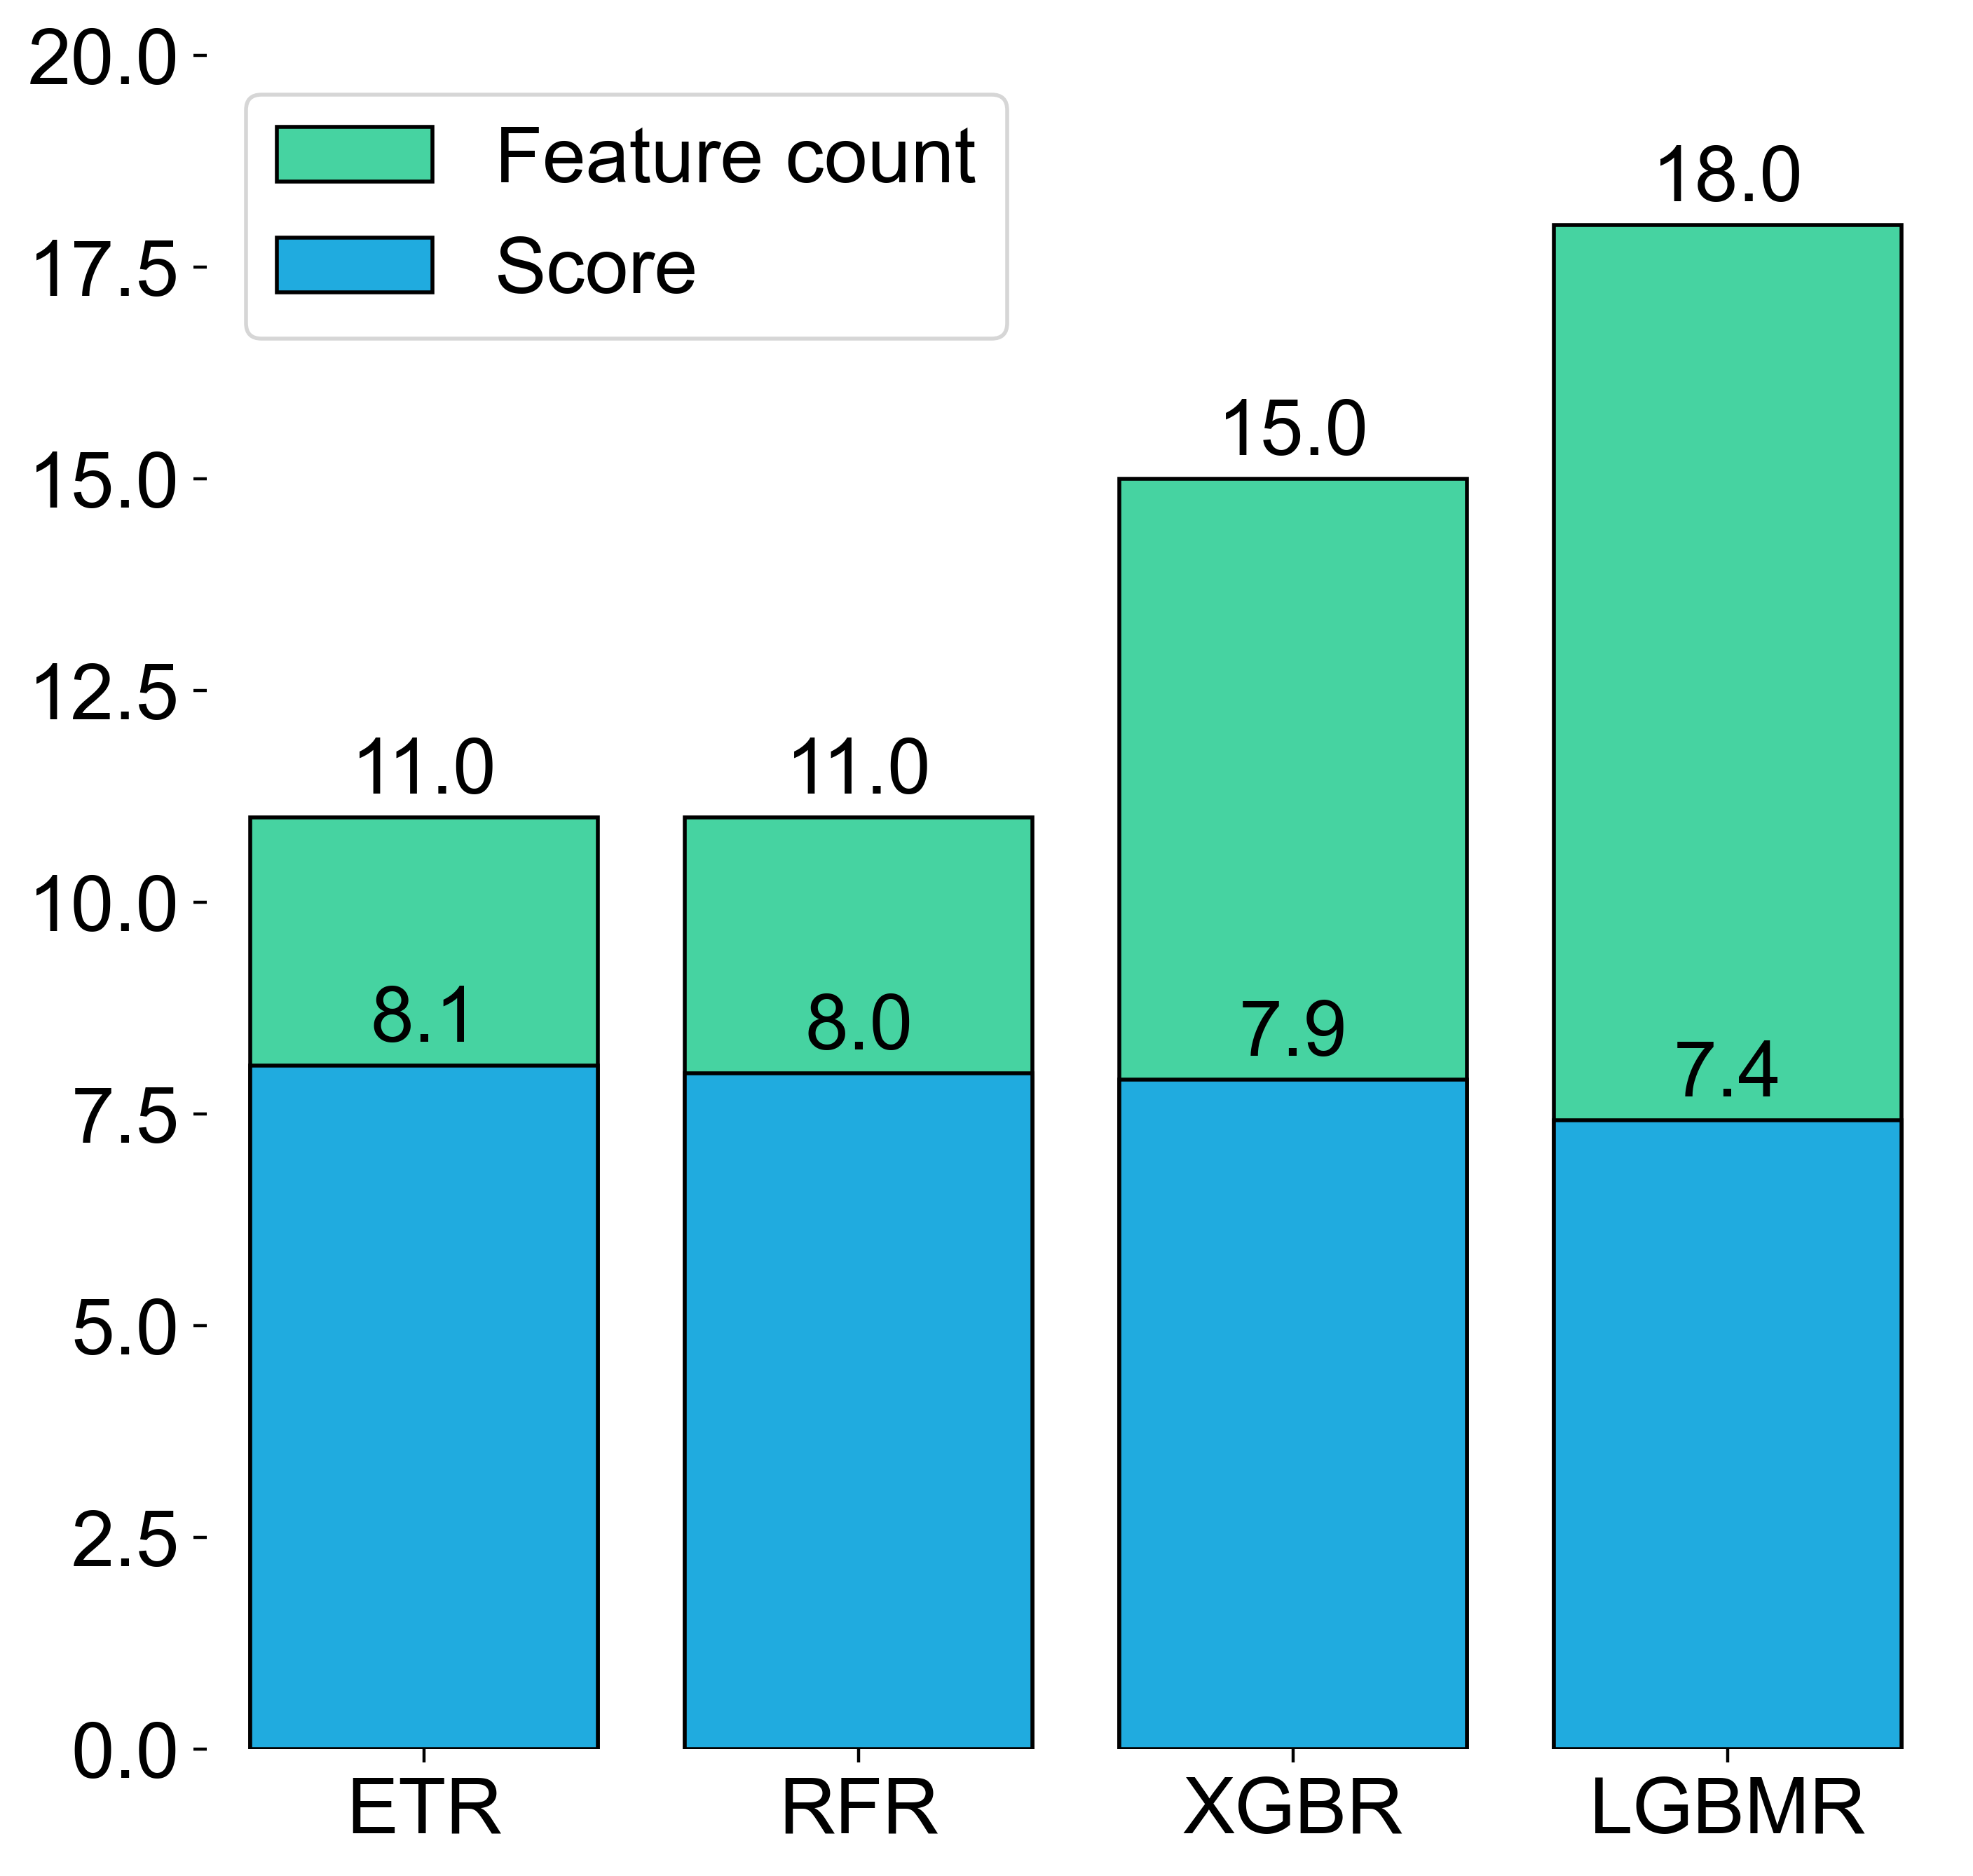

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 8))

tmp = {'Model':['RFR','XGBR','ETR','LGBMR'],
        'score':[result.iloc[0,2]*10,result.iloc[1,2]*10,result.iloc[2,2]*10,result.iloc[3,2]*10],
        'n_features':[result.iloc[0,3],result.iloc[1,3],result.iloc[2,3],result.iloc[3,3]]}
model_result = pd.DataFrame(tmp)
model_result = model_result.sort_values("score", ascending=False)



sns.set_color_codes("muted")
sns.barplot(y="n_features", x="Model", data=model_result,
            label="Feature count", color="#2feaa8",edgecolor='black')

sns.set_color_codes("pastel")
sns.barplot(y="score", x="Model", data=model_result,
            label="Score", color="#00B9FF",edgecolor='black')

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}',  # 保留1位小数
        (p.get_x() + p.get_width()/2., p.get_height()+0.3),
        ha='center', 
        va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=20,
        fontweight='medium'
    )


ax.legend(ncol=1, loc="upper left", frameon=True,prop={'size': 20})


ax.set(ylim=(0, 20), ylabel="")

ax.set_ylabel("", fontsize=20)
ax.set_xlabel("")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('模型对比图.png',dpi=400, bbox_inches='tight')
sns.despine(left=True, bottom=True)

In [26]:
feature_set = result.iloc[2,1]
train_model = ExtraTreesRegressor(n_jobs=-1,random_state=42)

In [31]:
feature_set

"['A_Density', 'A_covalent Radius', 'B_atomic Radius', 'B_FirstIonization', 'B_number of Valence Electrons', 'A_number of s+p Electrons', 'B_number of s+p Electrons', 'A_number of d Electrons', 'B_number of d Electrons', 'A-B_number of Valence Electrons', '(A+B)-O_number of d Electrons']"

In [33]:
import ast
feature_set = ast.literal_eval(feature_set)
feature_set

['A_Density',
 'A_covalent Radius',
 'B_atomic Radius',
 'B_FirstIonization',
 'B_number of Valence Electrons',
 'A_number of s+p Electrons',
 'B_number of s+p Electrons',
 'A_number of d Electrons',
 'B_number of d Electrons',
 'A-B_number of Valence Electrons',
 '(A+B)-O_number of d Electrons']

In [44]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tqdm import tqdm
error1 = []
error2 = []
r2_prm = []
error1_base=[]
error2_base=[]
r2_prl=[]
train_set = []
test_set = []
tmp_df = pd.DataFrame()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_indices = kf.split(X,y)
base_features = pysic_features_ABO3[feature_set]
for i,(train_index, test_index) in enumerate(cv_indices):
    train_set.append(train_index)
    test_set.append(test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    X_train = X_train[feature_set]
    X_test = X_test[feature_set]
    name = f"fold_{i}"
    train_model.fit(X_train, y_train)
    y_pred =  train_model.predict(X_test)
    mae_model = mean_absolute_error(y_test, y_pred)
    rmse_model = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_model = r2_score(y_test,y_pred)
    error1.append(mae_model)
    error2.append(rmse_model)
    r2_prm.append(r2_model)
    
    y_base = train_model.predict(base_features)
    tmp_df[f'column_{i}'] = y_base
    MAE_BASE = mean_absolute_error(y_base,y_eg_abo3)
    RMSE_BASE = np.sqrt(mean_squared_error(y_base,y_eg_abo3))
    R2_BASE = r2_score(y_base,y_eg_abo3)
    error1_base.append(MAE_BASE)
    error2_base.append(RMSE_BASE)
    r2_prl.append(R2_BASE)
    print(name)
    print(f"Performance on the test set: MAE = %0.4f,RMSE = %0.4f, R2 = %0.4f" % (mae_model, rmse_model, r2_model))
    print(f"Performance on the small set: MAE = %0.4f,RMSE = %0.4f, R2 = %0.4f" % (MAE_BASE, RMSE_BASE, R2_BASE))
mean_error1 = sum(error1) / len(error1)
mean_error2 = sum(error2) / len(error2)
mean_r2 = sum(r2_prm) / len(r2_prm)
print('Performance on the test set using 5-fold: MAE = %0.4f' % mean_error1)
print('Performance on the test set using 5-fold: RMSE = %0.4f' % mean_error2)
print('Performance on the test set using 5-fold: R2 = %0.4f' % mean_r2)

mean_error1_base = sum(error1_base) / len(error1_base)
mean_error2_base = sum(error2_base) / len(error2_base)
mean_r2_base = sum(r2_prl) / len(r2_prl)
print('Performance on the valid set using 5-fold: MAE = %0.4f' % mean_error1_base)
print('Performance on the valid set using 5-fold: RMSE = %0.4f' % mean_error2_base)
print('Performance on the valid set using 5-fold: R2 = %0.4f' % mean_r2_base)

fold_0
Performance on the test set: MAE = 0.3872,RMSE = 0.5438, R2 = 0.8071
Performance on the small set: MAE = 0.4330,RMSE = 0.5367, R2 = 0.6415
fold_1
Performance on the test set: MAE = 0.3941,RMSE = 0.5565, R2 = 0.7966
Performance on the small set: MAE = 0.4170,RMSE = 0.5408, R2 = 0.6557
fold_2
Performance on the test set: MAE = 0.3900,RMSE = 0.5488, R2 = 0.8088
Performance on the small set: MAE = 0.4019,RMSE = 0.5266, R2 = 0.6930
fold_3
Performance on the test set: MAE = 0.3852,RMSE = 0.5457, R2 = 0.8032
Performance on the small set: MAE = 0.4227,RMSE = 0.5340, R2 = 0.6828
fold_4
Performance on the test set: MAE = 0.3827,RMSE = 0.5421, R2 = 0.8068
Performance on the small set: MAE = 0.3994,RMSE = 0.5078, R2 = 0.7014
Performance on the test set using 5-fold: MAE = 0.3878
Performance on the test set using 5-fold: RMSE = 0.5474
Performance on the test set using 5-fold: R2 = 0.8045
Performance on the valid set using 5-fold: MAE = 0.4148
Performance on the valid set using 5-fold: RMSE =

In [35]:
best_train_index = train_set[4]
best_test_index = test_set[4]
best_X_train = X.loc[best_train_index].reset_index(drop=True)
best_X_test = X.loc[best_test_index].reset_index(drop=True)
best_y_train = y.loc[best_train_index].reset_index(drop=True)
best_y_test = y.loc[best_test_index].reset_index(drop=True)

In [36]:
best_X_train = best_X_train[feature_set]
best_X_test = best_X_test[feature_set]

In [62]:
model = ExtraTreesRegressor(n_jobs=-1, random_state=42)
model.fit(best_X_train, best_y_train)
y_pred = model.predict(best_X_test)
MAE_4 = mean_absolute_error(best_y_test,y_pred)
RMSE_4 = np.sqrt(mean_squared_error(best_y_test, y_pred))
R2_4 = r2_score(best_y_test,y_pred)
print('Performance on the test set: MAE = %0.4f' % MAE_4)
print('Performance on the test set: RMSE = %0.4f' % RMSE_4)
print('Performance on the test set: R2 SCORE = %0.4f' % R2_4)

Performance on the test set: MAE = 0.3827
Performance on the test set: RMSE = 0.5421
Performance on the test set: R2 SCORE = 0.8068


In [45]:
# import json
# with open("best_feature_p.json", "w") as f:
#     json.dump(feature_set, f)

In [63]:
import pickle
with open('model_p.pkl', 'wb') as f:
    pickle.dump(model, f)

In [37]:
# origion_error = abs(best_y_test-y_pred).tolist()
# origion_error = pd.DataFrame(origion_error, columns=['big_1'])
# origion_error.to_csv('origion_big_1.csv')

In [38]:
# oe = abs(tmp_df['column_0']-y_eg_abo3)
# oe = pd.DataFrame(oe,columns=['small_1'])
# oe.to_csv('origion_small_1.csv')

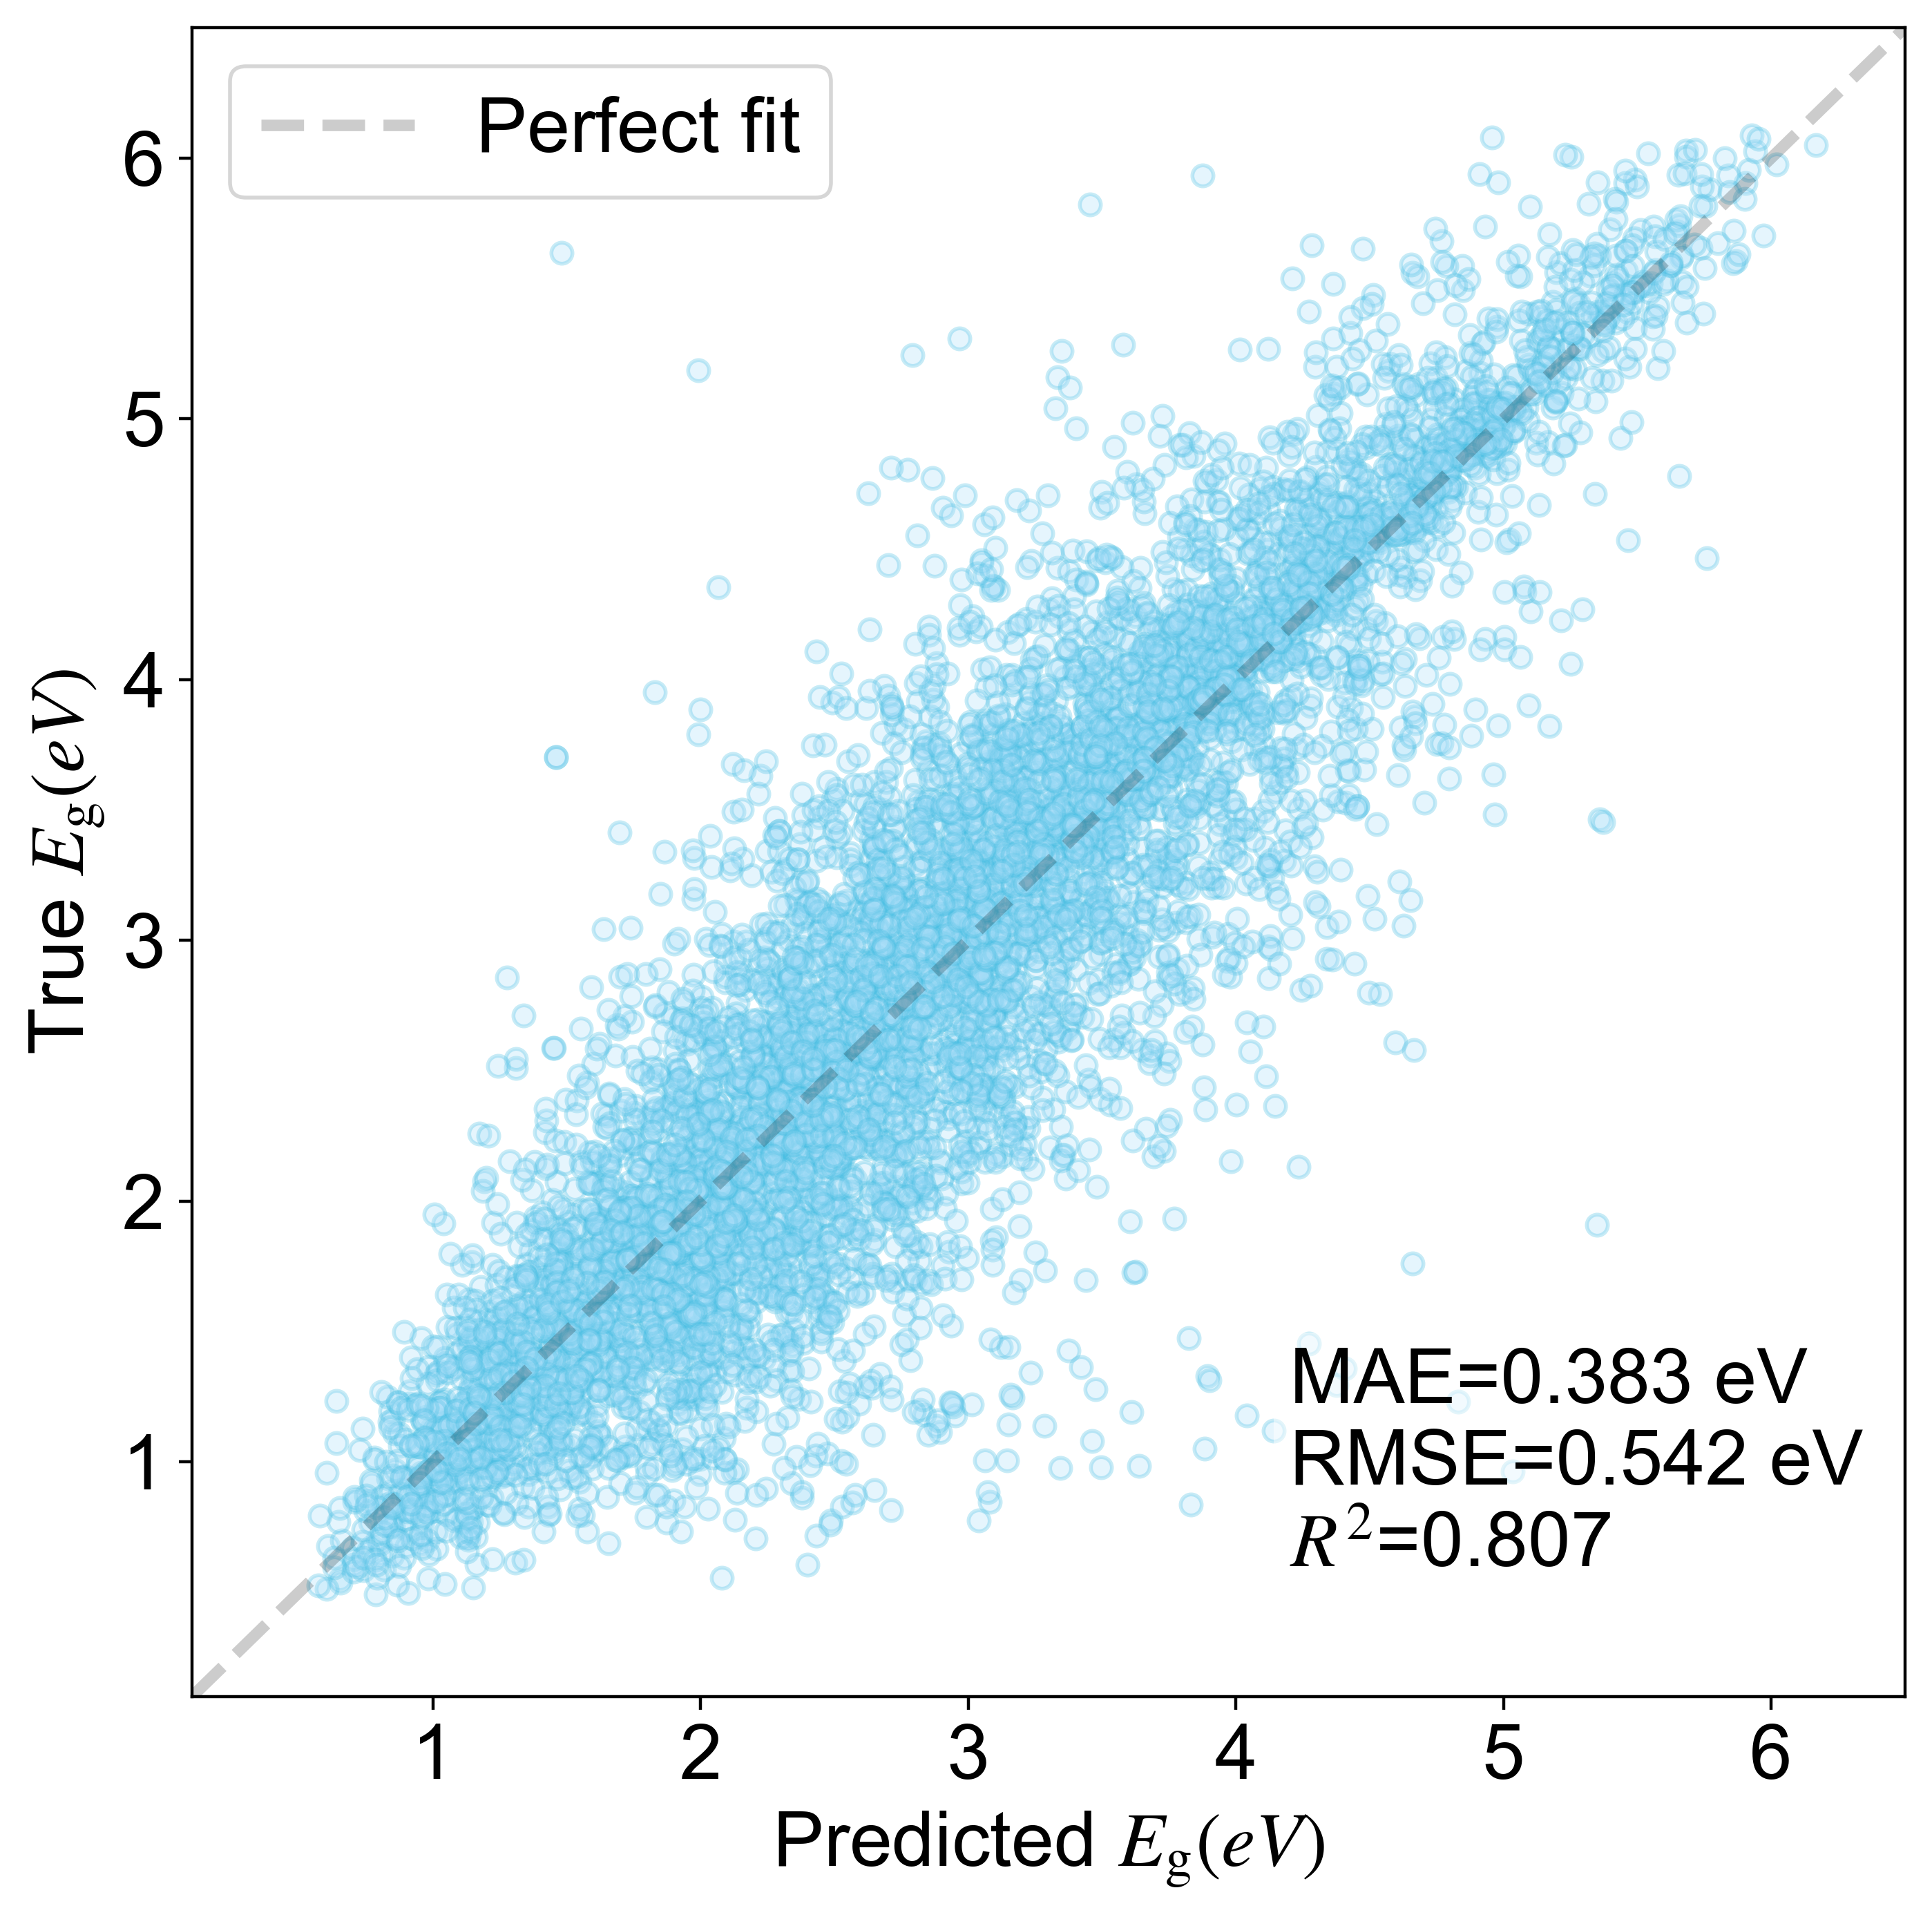

In [105]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
# sns.reset_orig()
fig,ax = plt.subplots(figsize=(8,8),facecolor="w")


ax.scatter(y_pred,best_y_test,alpha = 0.3,s = 30, facecolor='#a9def9',edgecolor = '#48bfe3',linewidth = 1)
# cbar = fig.colorbar(sc)
# cbar.ax.yaxis.set_ticks([])

plt.xlim(0.1,6.5)
plt.ylim(0.1,6.5)
ax.plot([0.1, 6.5], [0.1, 6.5], linestyle='--', color='black',alpha = 0.2,lw=3,label='Perfect fit')

ax.legend(fontsize = 20)

model_result = "MAE=0.383 eV\nRMSE=0.542 eV\n$ R^{\mathrm{2}}$=0.807"
ax.text(4.2,0.6,model_result,fontsize=20,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

ax.set_xlabel('Predicted '+r'$E_{\mathrm{g}}(eV)$',fontsize = 20)
ax.set_ylabel('True '+ r'$E_{\mathrm{g}} (eV)$',fontsize = 20)

# Set aspect of the main Axes.


# create new Axes on the right and on the top of the current Axes
# divider = make_axes_locatable(ax)
# below height and pad are in inches
# ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
# ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)


# # make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

binwidth = 0.25
xymax = max(np.max(np.abs(y_pred)), np.max(np.abs(y_test)))
lim = (int(xymax/binwidth) + 1)*binwidth

# bins = np.arange(0, lim + binwidth, binwidth)
# ax_histx.hist(y_pred, bins=bins,color='#4895ef')
# ax_histy.hist(y_test, bins=bins, orientation='horizontal',color='#4895ef')


plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.savefig('物理描述符.png',dpi=400, bbox_inches='tight')

In [110]:
error_data = pd.DataFrame(columns = ['formula','valid_Eg','pred_Eg'])
error_data['formula'] = base_metal_oxide['formula']
error_data['valid_Eg'] = base_metal_oxide['target']
error_data['pred_Eg'] = tmp_df['column_4']
error_data['diff'] = abs(error_data['valid_Eg'] - error_data['pred_Eg'])
error_data = error_data.sort_values(by='diff', ascending=False).reset_index(drop = True)
error_data

formula  valid_Eg   pred_Eg      diff
0   BaCeO3  3.941353  2.549974  1.391379
1   DyInO3  2.996601  4.165290  1.168689
2   TaAgO3  3.135210  2.224337  0.910873
3   NbAgO3  2.606289  1.734958  0.871331
4   PmInO3  3.056738  3.926132  0.869393
5   TiPbO3  2.584444  1.811865  0.772579
6   InSbO3  0.751440  1.470159  0.718719
7   CdSnO3  1.230115  1.913411  0.683296
8   GdAlO3  3.423982  4.100441  0.676459
9   LaCrO3  1.903900  1.232897  0.671003
10  NdInO3  2.999078  3.669587  0.670509
11  CdGeO3  1.748022  2.416932  0.668910
12  CeBeO3  2.439456  1.783251  0.656205
13  GaBiO3  2.249296  2.880561  0.631265
14  HfPbO3  3.538460  2.927573  0.610887
15  SmFeO3  0.723500  1.330686  0.607186
16  InBiO3  1.050888  1.655248  0.604360
17   KTaO3  3.328060  2.752202  0.575858
18  NaNbO3  2.833721  2.319058  0.514663
19  PmErO3  3.361074  3.817815  0.456740
20  GdCrO3  0.825000  1.278116  0.453116
21  ZrPbO3  3.477219  3.066321  0.410898
22   YFeO3  0.637300  1.038843  0.401543
23  CsNbO3  2.453558  2.820931  0.367373
24  EuHfO3  1.513985  1.177671  0.336314
25  RbNbO3  2.697864  2.371014  0.326850
26  EuZrO3  1.348938  1.054386  0.294551
27  TiSnO3  1.899045  2.186674  0.287629
28  BaSnO3  1.883683  2.155409  0.271726
29  YbGeO3  2.036664  2.287324  0.250660
30  HfBeO3  2.544336  2.782219  0.237883
31  MgTiO3  3.194852  3.428162  0.233310
32   YCrO3  1.767900  1.540153  0.227747
33  NdCrO3  1.904000  1.705714  0.198286
34  CaTiO3  3.207814  3.015168  0.192646
35   YCoO3  0.833000  0.642549  0.190451
36  TmCrO3  1.928900  2.092012  0.163112
37  SnPbO3  2.035434  1.877888  0.157546
38  TaTlO3  1.757035  1.604560  0.152475
39  NdCoO3  0.791400  0.644832  0.146568
40  CsTaO3  3.110664  2.967465  0.143199
41  NbTlO3  1.074396  1.213562  0.139166
42  SmCrO3  1.736200  1.636431  0.099769
43  ScCoO3  0.786000  0.714015  0.071985
44  PrCrO3  1.847000  1.786620  0.060380
45  SmCoO3  0.803900  0.752723  0.051177
46  RbTaO3  3.238719  3.288951  0.050232
47   KNbO3  2.591651  2.626900  0.035249
48  LaFeO3  0.848400  0.879434  0.031034
49  SrSnO3  2.577727  2.598738  0.021011
50  SrTiO3  3.094581  3.075679  0.018902
51  BaTiO3  2.868957  2.851316  0.017641

In [111]:
error_data.to_csv('physical_errror.csv')

In [41]:
train_data = X[feature_set]
predict_y = model.predict(train_data)

In [42]:
large_error_data = pd.DataFrame(columns = ['valid_Eg','pred_Eg'])
large_error_data['valid_Eg'] = y
large_error_data['pred_Eg'] = predict_y
large_error_data['diff'] = abs(large_error_data['valid_Eg'] - large_error_data['pred_Eg'])
large_error_data = large_error_data.sort_values(by='diff', ascending=False).reset_index(drop = True)
large_error_data

valid_Eg   pred_Eg      diff
0      5.635777  1.482187  4.153590
1      0.963888  5.033671  4.069782
2      1.230096  4.830727  3.600631
3      1.909461  5.348228  3.438767
4      5.187022  1.990889  3.196132
...         ...       ...       ...
35320  4.703251  4.703251  0.000000
35321  5.079119  5.079119  0.000000
35322  4.581373  4.581373  0.000000
35323  3.479053  3.479053  0.000000
35324  3.178124  3.178124  0.000000

[35325 rows x 3 columns]

In [43]:
# large_error_data.to_csv('large_physical_error.csv')